In [34]:
from sklearn.decomposition import PCA

In [35]:
vstack_df = np.vstack((training_img, validation_img, test_img))

In [36]:
PCA_result = PCA(200).fit_transform(vstack_df)

In [37]:
training_img = PCA_result[:55000, :]
validation_img = PCA_result[55000: 60000, :]
test_img = PCA_result[60000:, :]

Accuracy of Test data : 0.9211


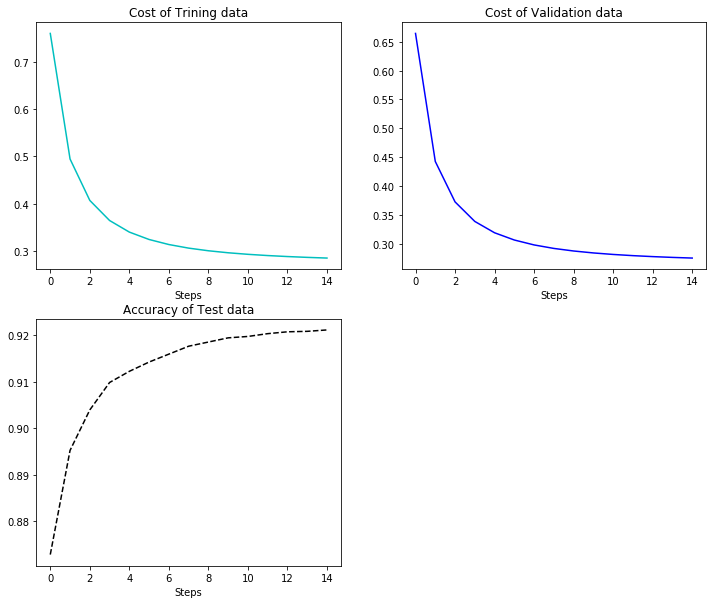

In [38]:
# Set variables and layers

X = tf.placeholder(tf.float32, [None, 200])
Y = tf.placeholder(tf.float32, [None, 10])

H = tf.layers.dense(X, 10, activation=tf.nn.softmax)

loss = - tf.reduce_mean(tf.reduce_sum(Y * tf.log(H), reduction_indices=[1]))
train = tf.train.AdamOptimizer(0.001).minimize(loss)

correct_prediction = tf.equal(tf.argmax(H,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()
sess.run(tf.global_variables_initializer())

cost_list = []
val_list = []
acc_list = []

batch_size = 100
n_epoch = 15

for i in range(n_epoch):
    cost = 0
    x_batch = group_list(training_img, batch_size)
    y_batch = group_list(training_lab, batch_size)

    for j in range(55000//batch_size):
        batch_xs = next(x_batch)
        batch_ys = next(y_batch)
        _, c  = sess.run([train, loss], feed_dict={X: batch_xs, Y: batch_ys})
        cost += c/(55000//batch_size)
    cost_list.append(cost)

    cost_ = sess.run(loss, feed_dict={X: validation_img, Y: validation_lab})
    acc = sess.run(accuracy, feed_dict={X: test_img, Y: test_lab})
    val_list.append(cost_)    
    acc_list.append(acc)
    
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title("Cost of Trining data")
plt.xlabel("Steps")
_ = plt.plot(cost_list, "c")

plt.subplot(222)
plt.title("Cost of Validation data")
plt.xlabel("Steps")
_ = plt.plot(val_list, "b")

plt.subplot(223)
plt.title("Accuracy of Test data")
plt.xlabel("Steps")
_ = plt.plot(acc_list, "k--")

print("Accuracy of Test data : %s" %acc)